# MDM 3 Project 2 - Interdisciplinarity

Author(s) - Mike Talbot  
Date Created - 08/12/18  
Date Last Modified - 10/12/18  
GitRepo - [LINK](https://github.com/miketalbotbox/MDM_Interdisciplinarity "Super GitHub Repo Yay!")



Utility:  
Code created to pull 'Authors_ID' from the supplied articles.csv file in order
to assign connections between authors and be able to compare who works with who.

Features:  
Ability to pull 'Authours_ID' from File  
Recreates a 2D array containing every Author for each Article  
Creates a list of each separate Author. \(Currently a reduced list due to the
high volume of data, not a complaint, the more the merrier but I want my laptop
to not hate me ;P \)  
Creates a connectivity matrix based on who has worked on what article, only
tested on small data sets so far (Controlled by the variable "Article_Limit")  
Creates a network of all the authors and who they've worked with, however data
is so sparse it can be hard to read any connections between articles.  

Note:  
Please feel free to adapt and change code, just make notes if you are changing
any purposes and wack on any credits you want ;P  


EDITS LOG:  
08/12/18: Created file to read the articles.csv file and take out the authors_id allowing us to create a large connectivity matrix  
Altered the code from making a matrix of connectivity to producing a list of
all connections, i.e. (a,b) means there is a link from a to b. This is so that data can be parsed into networkx to attempt to produce pretty networks  
10/12/18: Made it work for journals.csv! apparently it had a dumb first line which made the rest of data be like "HEY!!! we dont fit all under one title", so it was fixed in two ways, either by making the engine python not c which allowed the extra columns. The second fix was easier, just remove the first line with 'skiprows=\[0\]'
An attempt to try and link authors with their respective subjects.

TODO LOG:  
(More just an ideas place, throw anything in here)  
Make a network pretty - ✓   
Make unefficeint code efficient!  
Make journals.csv work - ✓
Measure Successes
* Success vs Similarity of Authors Subjects
* Success vs Text from abstracts - text mining

    

In [1]:
"""
Cool fresh imports all the way from the internets to make the magic happen!
"""
import pandas
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [45]:
"""
Practising how pandas are useful in extracting data, currently (as of 08/12/18)
errors in reading Journals.csv due to a parsing error

TOP TIPS:
x.head() shows the top 5 rows in a dataset
x.tail() shows the bottom 5 rows in a dataset
^^^^ both of these are produced in a real nice way to see the data!
x["TITLE_NAME"] extracts that columns data with their respective index
"""

#Authors = pandas.read_csv('authors.csv')
Articles = pandas.read_csv('articles.csv')
#Journals = pandas.read_csv('journals.csv')
#Authors.head()
#Authors.tail()
#Journals.head()


"""
Code to take out the authors ID from the input data and separate out each author
A check is made to remove and blanks spaces which can be contained from how the
variables were stored within their .csv files.
"""

Articles_ID = Articles["Author(s) ID"]
#print(Articles_ID)
Articles_ID_Sep = [x.split(';')for x in Articles_ID]
for x in Articles_ID_Sep:
    if '' in x:
        x = x.remove('')
        
    
#print(Articles_ID_Sep[0:5])
#Articles_ID.head()
Articles[0:10]

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Funding Sponsor,Publisher,ISSN,ISBN,CODEN,PubMed ID,Document Type,Access Type,Source,EID
0,0,"Kashani M.M., Gonzalez-Buelga A., Thayalan R.P...",55500446200;55953963500;57204138183;5720413751...,Experimental investigation of a novel class of...,2018,Journal of Sound and Vibration,437,NaN,NaN,308,...,Engineering and Physical Sciences Research Cou...,Academic Press,0022460X,NaN,JSVIA,NaN,Article,Open Access,Scopus,2-s2.0-85054644235
1,1,"Rhodes K.M., Turner R.M., Payne R.A., White I.R.",56354767100;7404556631;12770785300;35235524000;,Computationally efficient methods for fitting ...,2018,Statistics in Medicine,37,29,NaN,4557,...,NaN,John Wiley and Sons Ltd,02776715,NaN,SMEDD,30155902.0,Article,Open Access,Scopus,2-s2.0-85052807807
2,2,"Mulakkal M.C., Trask R.S., Ting V.P., Seddon A.M.",57191226503;13612149400;57203857161;7005893770;,Responsive cellulose-hydrogel composite ink fo...,2018,Materials and Design,160,NaN,NaN,108,...,NaN,Elsevier Ltd,02641275,NaN,NaN,NaN,Article,Open Access,Scopus,2-s2.0-85053196530
3,3,"Patni M., Minera S., Groh R.M.J., Pirrera A., ...",57200943298;57200943981;25031087800;2443683370...,Three-dimensional stress analysis for laminate...,2018,Composites Part B: Engineering,155,NaN,NaN,299,...,Royal Society,Elsevier Ltd,13598368,NaN,CPBEF,NaN,Article,Open Access,Scopus,2-s2.0-85053012172
4,4,"Muller C., Biggs J., Ebmeier S.K., Mothes P., ...",57188561741;14047886800;36679904200;6603155100...,Temporal evolution of the magmatic system at T...,2018,Journal of Volcanology and Geothermal Research,368,NaN,NaN,63,...,European Space Agency,Elsevier B.V.,03770273,NaN,NaN,NaN,Article,Open Access,Scopus,2-s2.0-85056612857
5,5,"Aaij R., Adeva B., Adinolfi M., Aidala C.A., A...",36493877000;7006017976;7103339969;9241383300;7...,Search for CP violation in Λb 0→pK− and Λb 0→p...,2018,"Physics Letters, Section B: Nuclear, Elementar...",787,NaN,NaN,124,...,Robert Schalkenbach Foundation,Elsevier B.V.,03702693,NaN,PYLBA,NaN,Article,Open Access,Scopus,2-s2.0-85055747508
6,6,Ellinas C.,56974030600;,Modelling indirect interactions during failure...,2018,Scientific Reports,8,1,4373,NaN,...,NaN,Nature Publishing Group,20452322,NaN,NaN,NaN,Article,Open Access,Scopus,2-s2.0-85044160957
7,7,"Busse H., Campbell R., Kipping R.",56417294000;55819464700;24391219000;,Examining the wider context of formal youth me...,2018,Children and Youth Services Review,95,NaN,NaN,95,...,Wellcome Trust,Elsevier Ltd,01907409,NaN,CYSRD,NaN,Article,Open Access,Scopus,2-s2.0-85055732351
8,8,"Cho H., Yu Y.",36450319100;55748345500;,Link prediction for interdisciplinary collabor...,2018,Social Network Analysis and Mining,8,1,25,NaN,...,NaN,Springer-Verlag Wien,18695450,NaN,NaN,NaN,Article,Open Access,Scopus,2-s2.0-85044571068
9,9,"Min J.L., Hemani G., Davey Smith G., Relton C....",57204782093;38861712000;57204292861;6603403494...,Meffil: efficient normalization and analysis o...,2018,"Bioinformatics (Oxford, England)",34,23,NaN,3983,...,NaN,NLM (Medline),13674811,NaN,NaN,29931280.0,Article,Open Access,Scopus,2-s2.0-85057173725


In [3]:
"""
Code reducing the complex array formed above into a list of each independant
author, hopefully helping to create a framework that will allow us to create
a connetivity matrix :D
A variable "Article_Limit" has been added to reduce the number of data sets the
code is running with for a faster prototyping phase
Another limit has been added, 'Max_Authors', this is due to an article having 
over 800 authors apparently. This value drowns out all the information we can 
see so this variable is here to dampen it.
NOTE:
A warning message does appear in this section, quote:
"FutureWarning: elementwise comparison failed; returning scalar instead, but in
the future will perform elementwise comparison"
No issues have been caused so far, but just so you are warned :)
"""
Article_Limit = 100
Max_Authors = 50
Total_Authors = np.array([])
for Author_List in Articles_ID_Sep[0:Article_Limit]:
    if len(Author_List) <= Max_Authors:
        for author in Author_List:
            if author not in Total_Authors:
                Total_Authors = np.append(Total_Authors,author)
#print(Total_Authors)
Number_Of_Authors = len(Total_Authors)
print(Number_Of_Authors)

694


C:\Users\micha\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [4]:
"""
In theory this section will atttempt to make a NxN matrix, where N is the number
of independant authors. The values in said matrix are the number of times each
researcher has worked with each other.
This method is far from efficient and I would very much apprecciate any advice on
how to speed things up, but it is a working method. Like with three nested for
loops like damn thats a lot of looping.
'List_of_Connections' is used in the next block, however it was easy to 
implement here.
"""

Connectivity = np.zeros((Number_Of_Authors,Number_Of_Authors)) #An NxN Matrix
List_of_Connections = [] # a Mx2 array in for [[a,b],[a,c]] as in to mean a is connected to b and c
for Article_Authors in Articles_ID_Sep[0:Article_Limit]:
    if len(Author_List) <= Max_Authors:
        for Original_Author in Total_Authors:
            for Compared_Author in Total_Authors:
                if Compared_Author != Original_Author:
                    if (Compared_Author in Article_Authors \
                    and Original_Author in Article_Authors):
                        O = np.where(Total_Authors == Original_Author)
                        C = np.where(Total_Authors == Compared_Author)
                        Connectivity[O,C] += 1
                        List_of_Connections.append((Original_Author, Compared_Author))
                    
#print(Connectivity)                        

C:\Users\micha\Anaconda3\envs\myenv\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


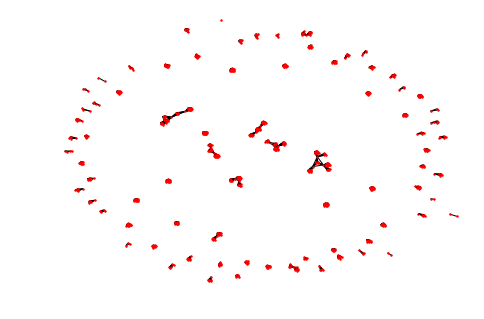

In [5]:
"""
Using the networkx package to allow a visual representation of the clusters.
This requires a modification to the previous part which includes the 
'List_of_Connections' which is a format that networkx prefers
Using matplotlib to plot the graphs allows a visual representation that clearly
shows each group of authors for each articles and any connections within


Note:
future thing that could be handy:
nx.connected_components(G)
shows what connected graphs there are, i.e. if there are two articles with no 
crossover of authors it'd produce two lists, however if one author contributed
to two articles then one large list would be made.
"""
Connection_Graph = nx.Graph()
Connection_Graph.add_nodes_from(Total_Authors)
Connection_Graph.add_edges_from(List_of_Connections)
nx.draw(Connection_Graph, node_size=2)

plt.show()

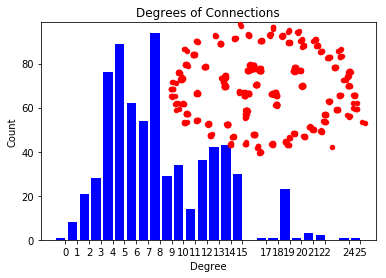

In [7]:
"""
Looking at the degree sequence for the above graph, the idea of this is to
check if there are degrees of an order higher than one so that we can find 
researchers who have collaborated with multiple sets of researchers

Note:
Idea of plotting this was taken from link here: (it looked cool so why not)
https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html
"""
import collections
Degree_Sequence = sorted([d for n, d in Connection_Graph.degree], reverse = True)
#print(Degree_Sequence)
Degree_Count = collections.Counter(Degree_Sequence)

Degree, Count = zip(*Degree_Count.items())
fig, ax = plt.subplots()
plt.bar(Degree,Count,width=0.8,color='b')

plt.title("Degrees of Connections")
plt.ylabel("Count")
plt.xlabel("Degree")

ax.set_xticks([d + 0.4 for d in Degree])
ax.set_xticklabels(Degree)

plt.axes([0.4,0.4,0.5,0.5])
nx.draw(Connection_Graph, node_size = 20)

plt.show()

In [20]:
"""
Area testing how to make the Journals work, it was an easy fix in the end as 
it was the first line that was messing things up :) so the fix was simple
Just skip the issue!
"""

Journals = pandas.read_csv('journals.csv', engine='python', skiprows=[0])
#Journals.head()

In [107]:
"""
Attempt to group up Authors with thier subject areas
Rather messy way of getting the subjects from the the authors list, the aim is
to link authors via thier subjects studied
For practice the list of authors will be reduced using 'Max_Authors'
"""
Max_Authors = 50
Authors = pandas.read_csv('authors.csv')
#print(Authors.head())
Authors_Subjects = Authors[["Auth-ID","Subject Area"]]
#print(Authors_Subjects[0:5])
Just_Authors_Subjects = Authors["Subject Area"].tolist()

#print(Just_Authors_Subjects)

Just_Authors_Subjects = [str(line) for line in Just_Authors_Subjects[0:Max_Authors]]
Authors_Subjects_List = [subjects.split('\n') for subjects in Just_Authors_Subjects]
if Authors_Subjects_List=='':
    Authors_Subjects_List=[]
    
print(len(Just_Authors_Subjects))

50


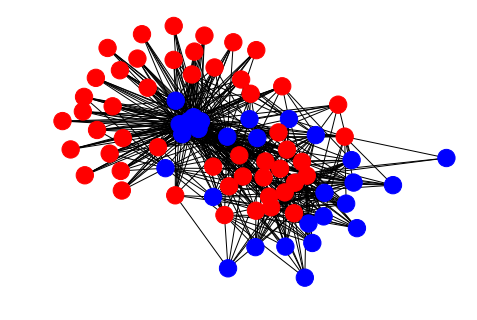

In [108]:
"""
Creating a list of subjects in the same way the Total_Authors list was created
above
The network will be created with two types of nodes, A) Nodes for the subjects
and B) nodes for the Authors. Therefore the layout of this will have no authors
linking to each other but instead each author will link to their subjects. If
you take a subject node then all nodes connected to it will be authors of that 
subject.
First the subject nodes are added, and to separate the difference a colour map
is added, blue being the subjects and red being the authors.
Having many authors again gives the issue that the network becomes too large
to be useful
"""
Total_Subjects = []
for person in Authors_Subjects_List:
    for subject in person:
        if subject not in Total_Subjects:
            Total_Subjects.append(subject)
Size_Subject = len(Total_Subjects) 
Colour_Map = []*(Size_Subject + Max_Authors)
Colour_Map[0:Size_Subject] = ['b']*Size_Subject
Colour_Map[Size_Subject:] = ['r']*Max_Authors
Subject_Graph = nx.Graph()
Subject_Graph.add_nodes_from(Total_Subjects)
Subject_Graph.add_nodes_from(Authors["Auth-ID"][0:Max_Authors].tolist())

Connection_List = []
for index in range(Max_Authors):
    person = Authors["Auth-ID"][index].tolist()
    #print(Total_Subjects[index])
    subjects = Authors_Subjects_List[index]
    for subject in subjects:
        Connection_List.append((person,subject))
    
Subject_Graph.add_edges_from(Connection_List)

nx.draw(Subject_Graph, node_color = Colour_Map)